# 12.3 Exercises

For the exercises we will use another mock-dataset. Assume the following scenario:

A research team tested a new therapy for reducing perceived stress over the course of 30 days. The generated data includes 200 stress level measures on a scale from 0 (no stress) to 100 (strong stress) at different time points after therapy start. 

The data is stored in two columns:

- `days`: The day of the measurement (0 to 30) after therapy start
- `stress`: The perceived stress level (0–100)

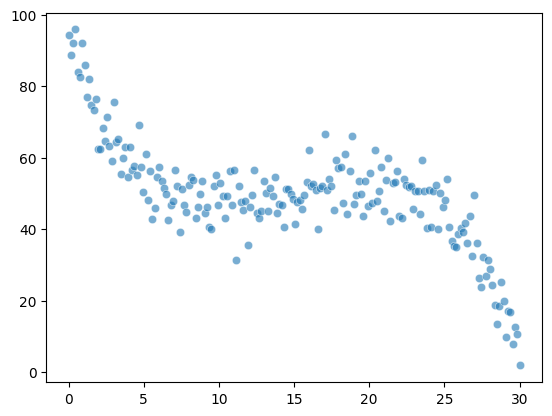

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------
# Simulate "Stress Reduction Therapy" Data
# ---------------------------------------- 
np.random.seed(42)

# Create data
n_points = 200
days = np.linspace(0, 30, n_points)
x_shifted = days - 15
true_stress = -((x_shifted**3) / 60 - x_shifted) + 50

# Add random noise and ensure scores between 0 and 100
noise = np.random.normal(0, 6.0, size=n_points)
stress = true_stress + noise
stress = np.clip(stress, 0, 100)

# Plot the data
sns.scatterplot(x=days, y=stress, alpha=0.6);

## Exercise 1: Fitting a linear model

Please fit a simple linear regression model to predict `stress` based on `days`. Please use the syntax as introduced in the previous chapters using `PolynomialFeatures` so it will be easy to explore higher-order models later.

You tasks are:

1. Create features for a linear regression 
2. Fit a linear model
3. Print and discuss the model summary
4. Plot the regression line on top of the data
5. Create a second plot for the residuals (either as a subplot or as two separate plots). Answer the following questions:
    - Are there patterns in the residuals that suggest the model is missing curvature?
    - Does the residual plot show systematic deviations (e.g., stress is consistently under/over-predicted at certain times)?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     198.9
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           1.01e-31
Time:                        20:05:03   Log-Likelihood:                -757.00
No. Observations:                 200   AIC:                             1518.
Df Residuals:                     198   BIC:                             1525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.1594      1.509     45.173      0.0

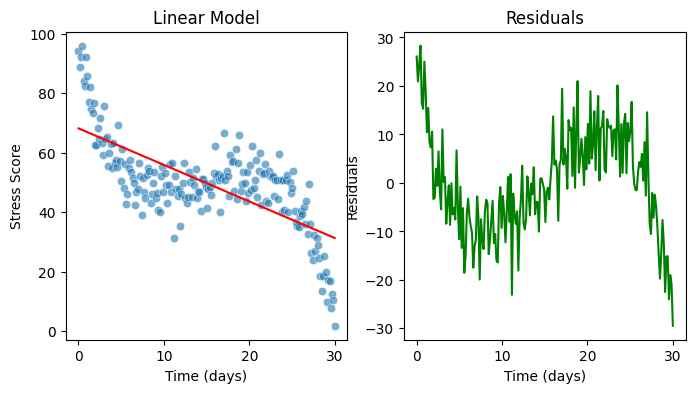

In [18]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# TODO: Exercise 1

# Create features
features = PolynomialFeatures(degree=1, include_bias=True)
features_p1 = features.fit_transform(days.reshape(-1, 1))

# Fit the model
model = sm.OLS(stress, features_p1)
model_fit = model.fit()
predictions = model_fit.predict(features_p1)
residuals = model_fit.resid

# Print model summary
print(model_fit.summary())

# Plot the data
fig, ax = plt.subplots(1,2, figsize=(8, 4))

sns.scatterplot(x=days, y=stress, alpha=0.6, ax=ax[0])
ax[0].plot(days, predictions, color='red')
ax[0].set(xlabel='Time (days)', ylabel='Stress Score', title="Linear Model")
ax[1].plot(days, residuals, color='green')
ax[1].set(xlabel='Time (days)', ylabel='Residuals', title="Residuals")

plt.show()

## Exercise 2: Improving the model

Do you think the linear model from the previous exercise can be improved? Which kind of polynomial might be suitable for the present data? Copy your code from the previous exercise and explore polynomials of different orders.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     419.7
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           4.93e-85
Time:                        20:05:04   Log-Likelihood:                -626.06
No. Observations:                 200   AIC:                             1260.
Df Residuals:                     196   BIC:                             1273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.2567      1.553     58.776      0.0

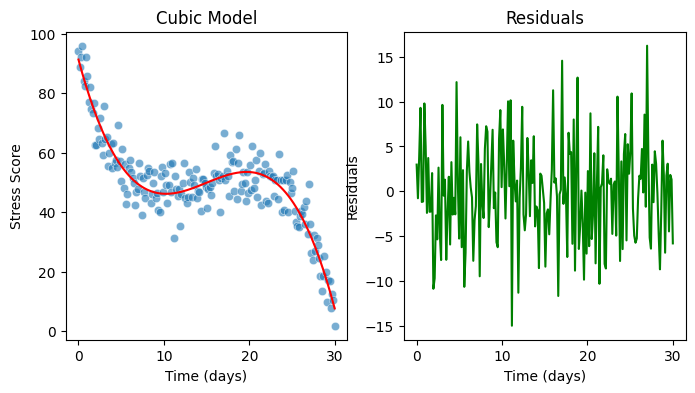

In [19]:
# TODO: Exercise 2

# Create features
features = PolynomialFeatures(degree=3, include_bias=True)
features_p1 = features.fit_transform(days.reshape(-1, 1))

# Fit the model
model = sm.OLS(stress, features_p1)
model_fit = model.fit()
predictions = model_fit.predict(features_p1)
residuals = model_fit.resid

# Print model summary
print(model_fit.summary())

# Plot the data
fig, ax = plt.subplots(1,2, figsize=(8, 4))

sns.scatterplot(x=days, y=stress, alpha=0.6, ax=ax[0])
ax[0].plot(days, predictions, color='red')
ax[0].set(xlabel='Time (days)', ylabel='Stress Score', title="Cubic Model")
ax[1].plot(days, residuals, color='green')
ax[1].set(xlabel='Time (days)', ylabel='Residuals', title="Residuals")

plt.show()

# Voluntary exercise: Centering predictors

Please center the `TimeDays` predictor and then fit a cubic model to the data. Print the model summary and discuss how the interpretation of the coefficients changes. Do you think it makes sense to center the predictr in this example?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     419.7
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           4.93e-85
Time:                        20:06:19   Log-Likelihood:                -626.06
No. Observations:                 200   AIC:                             1260.
Df Residuals:                     196   BIC:                             1273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8956      0.593     84.113      0.0

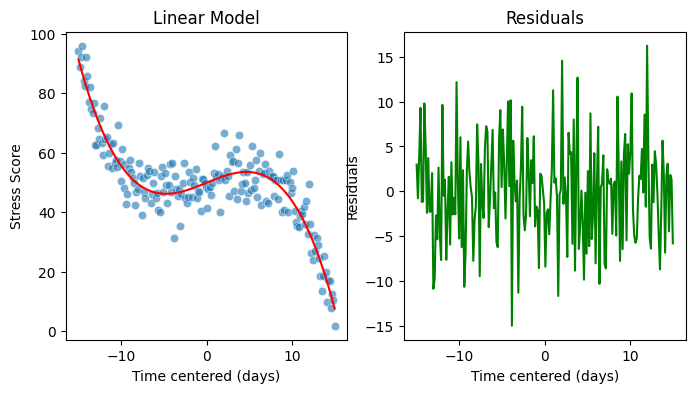

In [21]:
# TODO: Voluntary exercise

# Center the days
days_centered = days - np.mean(days)

# Create features
features = PolynomialFeatures(degree=3, include_bias=True)
features_p1 = features.fit_transform(days_centered.reshape(-1, 1))

# Fit the model
model = sm.OLS(stress, features_p1)
model_fit = model.fit()
predictions = model_fit.predict(features_p1)
residuals = model_fit.resid

# Print model summary
print(model_fit.summary())

# Plot the data
fig, ax = plt.subplots(1,2, figsize=(8, 4))

sns.scatterplot(x=days_centered, y=stress, alpha=0.6, ax=ax[0])
ax[0].plot(days_centered, predictions, color='red')
ax[0].set(xlabel='Time centered (days)', ylabel='Stress Score', title="Linear Model")
ax[1].plot(days_centered, residuals, color='green')
ax[1].set(xlabel='Time centered (days)', ylabel='Residuals', title="Residuals")

plt.show()